## Предсказываем инфаркт

### Цель :
- Предсказать, может ли у пациента случиться инфаркт
- Это задача **бинарной классификации** с множественными численными и категорийными значениями.

### Состав датасета:
    
- **id** : уникальный идентификатор
- **gender** : "Male", "Female" или "Other"
- **age** : возраст пациента
- **hypertension**: 0 если нет повышенного АД, 1 если есть
- **heart_disease** : 0 если нет заболеваний сердца, 1 если есть
- **ever_married** : "No" или "Yes"
- **work_type** : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (Ребенок, гос служба, никогда не работал, негос служба, самозанятый)
- **Residence_type** : "Rural" or "Urban" (Город или село)
- **avg_glucose_level** : средний уровень глюкозы в крови
- **bmi** : ИМТ
- **smoking_status** : "formerly smoked", "never smoked", "smokes" or "Unknown" (ранее курил/никогда не курил/курит/неизвестно)
- **stroke** : 1 если был инфаркт, 0 если нет

## Датасет

### Импорт библиотек

In [1156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [1157]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


### Data Info :

In [1159]:
data.shape

(5110, 12)

In [1160]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [1161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [1162]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Несколько пропущенных значений присутствовало в ИМТ. Впоследствии при выполнении этой ячейки не должен строиться хитмап и не должны появляться пустые значения, так как исходный датасет будет изменен.

In [1164]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


In [1165]:
print(stroke[['mean']])

                      mean
id                37115.07
age                  67.73
hypertension          0.27
heart_disease         0.19
avg_glucose_level   132.54
bmi                  30.47
stroke                1.00


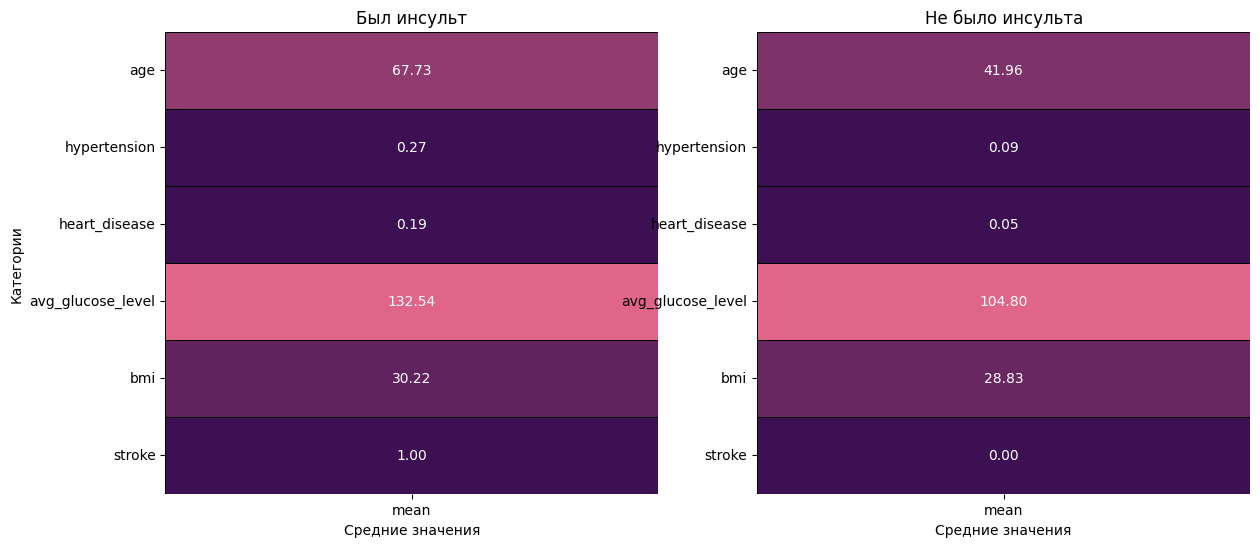

In [1306]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt

# Описательные статистики для stroke и no_stroke
stroke = data[data['stroke'] == 1].describe().T
no_stroke = data[data['stroke'] == 0].describe().T

# Создаём цветовую карту
colors = ['#3C1053', '#DF6589']
cmap = LinearSegmentedColormap.from_list('custom', colors)

# Создаём фигуру и subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Heatmap для stroke
sns.heatmap(stroke[['mean']], annot=True, cmap=cmap, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('Был инсульт')
ax[0].set_xlabel('Средние значения')
ax[0].set_ylabel('Категории')

# Heatmap для no_stroke
sns.heatmap(no_stroke[['mean']], annot=True, cmap=cmap, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('Не было инсульта')
ax[1].set_xlabel('Средние значения')

# Показываем график
plt.show()

Средние значения всех признаков для случаев перенесенного инсульта и не перенесенного инсульта.
Возраст и уровень среднего сахара в крови могут быть основными показателями для идентификации инсульта.
Среднее значение возраста пациентов, перенесших инсульт, 67.73 , значительно выше, чем у тех, кто не перенес инсульт, — 41.7 .
Аналогично, значение среднего уровня сахара в крови 132.54 может указывать на более высокий риск инсульта по сравнению со значением 104 80 , которое было обнаружено у пациентов, не перенесших инсульт.

### Заполнить недостающие значения:

In [1169]:
l1 = [i for i in tqdm(range(len(data.isnull()['bmi']))) if data.isnull().loc[i,'bmi'] == True]
print('Total Number of Missing Values in bmi feature :', len(l1))

100%|██████████████████████████████████████████████████████████████████████████████████████████| 5110/5110 [00:16<00:00, 310.50it/s]

Total Number of Missing Values in bmi feature : 201


- Из таблицы описательной статистики мы наблюдаем, что средние и медианные значения **bmi** очень близки друг к другу. 
- Поэтому мы заполним пропущенные значения **средними значениями**.

In [1171]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

## Разведочный анализ

### Разделение данных на дискретные и категорийные:

In [1174]:
data.drop(columns = ['id'],inplace = True)
col = list(data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

data['age'] = data['age'].astype(int)
df1 = data.copy(deep = True)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


Мы удаляем столбец **id**, так как он является всего лишь уникальным идентификатором.  
Здесь категориальные признаки определяются, если атрибут имеет менее 6 уникальных элементов; в противном случае это дискретный признак.  
Типичный подход к такой классификации признаков также может основываться на типах данных элементов соответствующего атрибута.  
Пример: тип данных = целое число, атрибут = дискретный признак; тип данных = строка, атрибут = категориальный признак.  
Создаем глубокую копию исходного набора данных для экспериментов с данными, визуализацией и моделированием.  
Изменения в исходном наборе данных не будут отражаться в этой глубокой копии.  
Теперь мы применяем кодирование меток (Label Encoding) к категориальным текстовым признакам данных.

In [1176]:
le = LabelEncoder()
text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    df1[i] = le.fit_transform(df1[i])
    l3.append(list(df1[i].unique())); l4.append(list(le.inverse_transform(df1[i].unique())))
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 134.69it/s]

gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
ever_married  :  [1 0]  =  ['Yes' 'No']
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Мы храним преобразования кодирования меток внутри словаря, который предоставляет информацию о закодированном значении и его исходном значении
Мы добавляем оставшиеся 2 признака вручную, а именно **heart_disease** (болезни сердца) и **hypertension** (гипертония)!

In [1178]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_data_features[i]][j] = k

tf1['hypertension'] = {0 : 'No Hypertension', 1 : 'Hypertension'} 
tf1['heart_disease'] = {0 : 'No Heart Disease', 1 : 'Heart Disease'}
tf1

{'gender': {1: 'Male', 0: 'Female', 2: 'Other'},
 'ever_married': {1: 'Yes', 0: 'No'},
 'work_type': {2: 'Private',
  3: 'Self-employed',
  0: 'Govt_job',
  4: 'children',
  1: 'Never_worked'},
 'Residence_type': {1: 'Urban', 0: 'Rural'},
 'smoking_status': {1: 'formerly smoked',
  2: 'never smoked',
  3: 'smokes',
  0: 'Unknown'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

### Таргетная визуализация переменной (инсульт): 

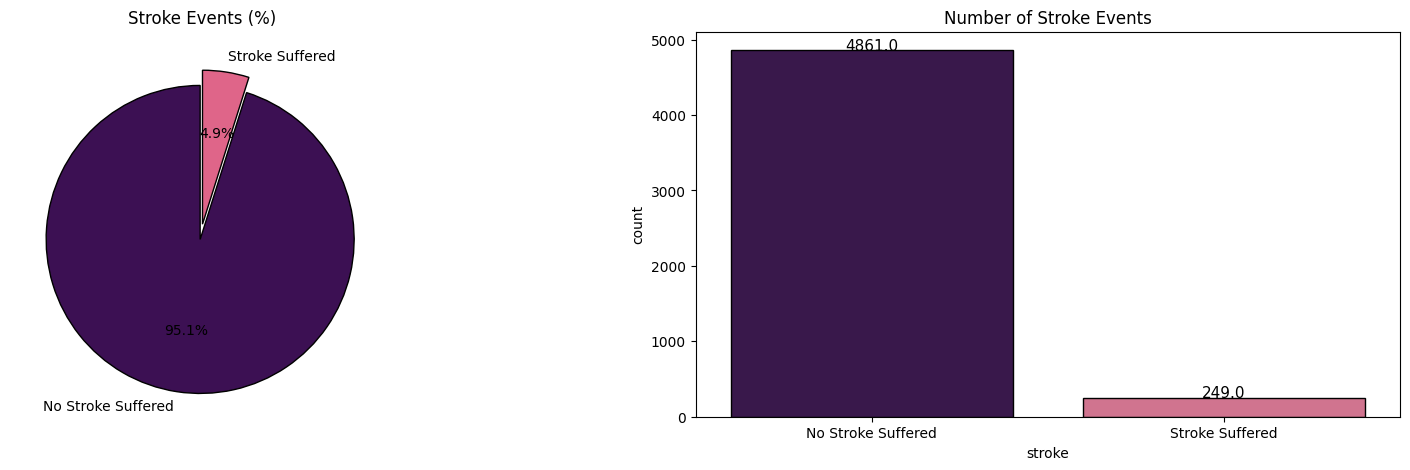

In [1308]:
l = list(df1['stroke'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Stroke Suffered','Stroke Suffered'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Stroke Events (%)');
plt.subplot(1,2,2)
ax = sns.countplot(x='stroke',data = df1, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(['No Stroke Suffered','Stroke Suffered'])
    plt.title('Number of Stroke Events');
plt.show()

Очевидно, что датасет несбалансирован в пользу отсутствия инсульта.  
Наблюдается соотношение 19:1 для категорий "без инсульта" к "инсульту"!  
Следовательно, из-за такой значительной предвзятости в сторону случаев "без инсульта", прогнозы нельзя считать надежными!

### Дискретные переменные :

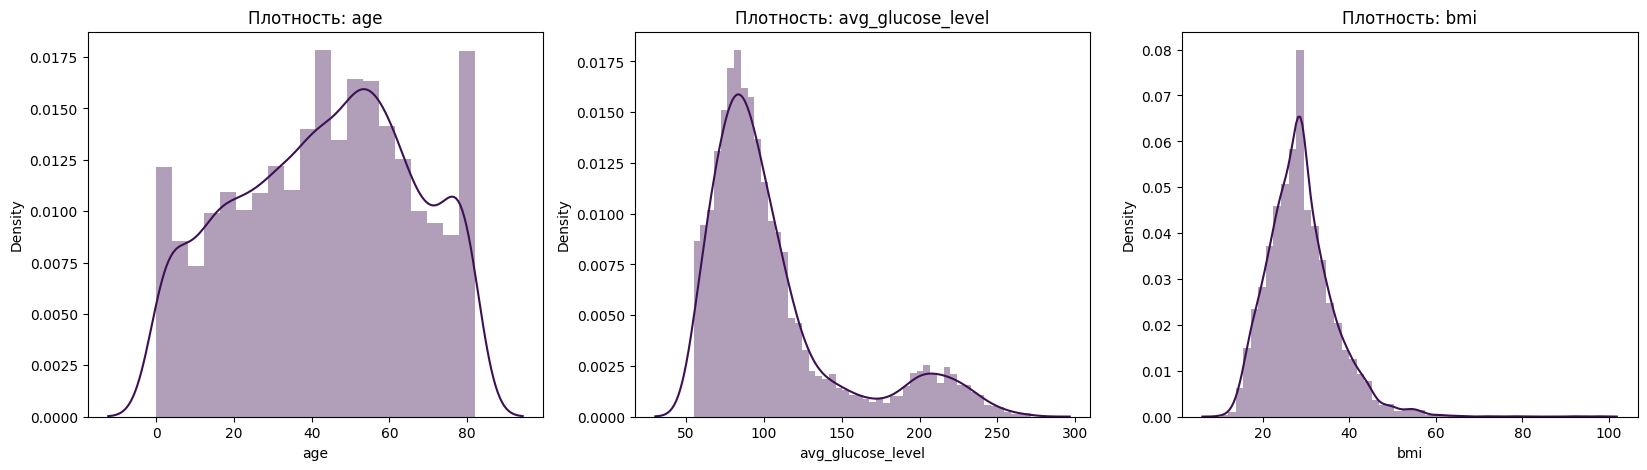

In [1183]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[discrete_features[i]],color = colors[0])
    title = 'Плотность: ' + discrete_features[i]
    plt.title(title)
plt.show()

- Распределение данных для **возраста (age)** имеет преобладающие значения около: **50** и **80**.
- **Средний уровень сахара в крови (avg_glucose_level)** имеет два пика неравной высоты, расположенные около значений: **100** и **200**.
- **Индекс массы тела (bmi)** имеет распределение, близкое к **нормальному**, но содержит небольшие значения в правой часи!

### Дискретные признаки относительно целевой переменной (инсульт):


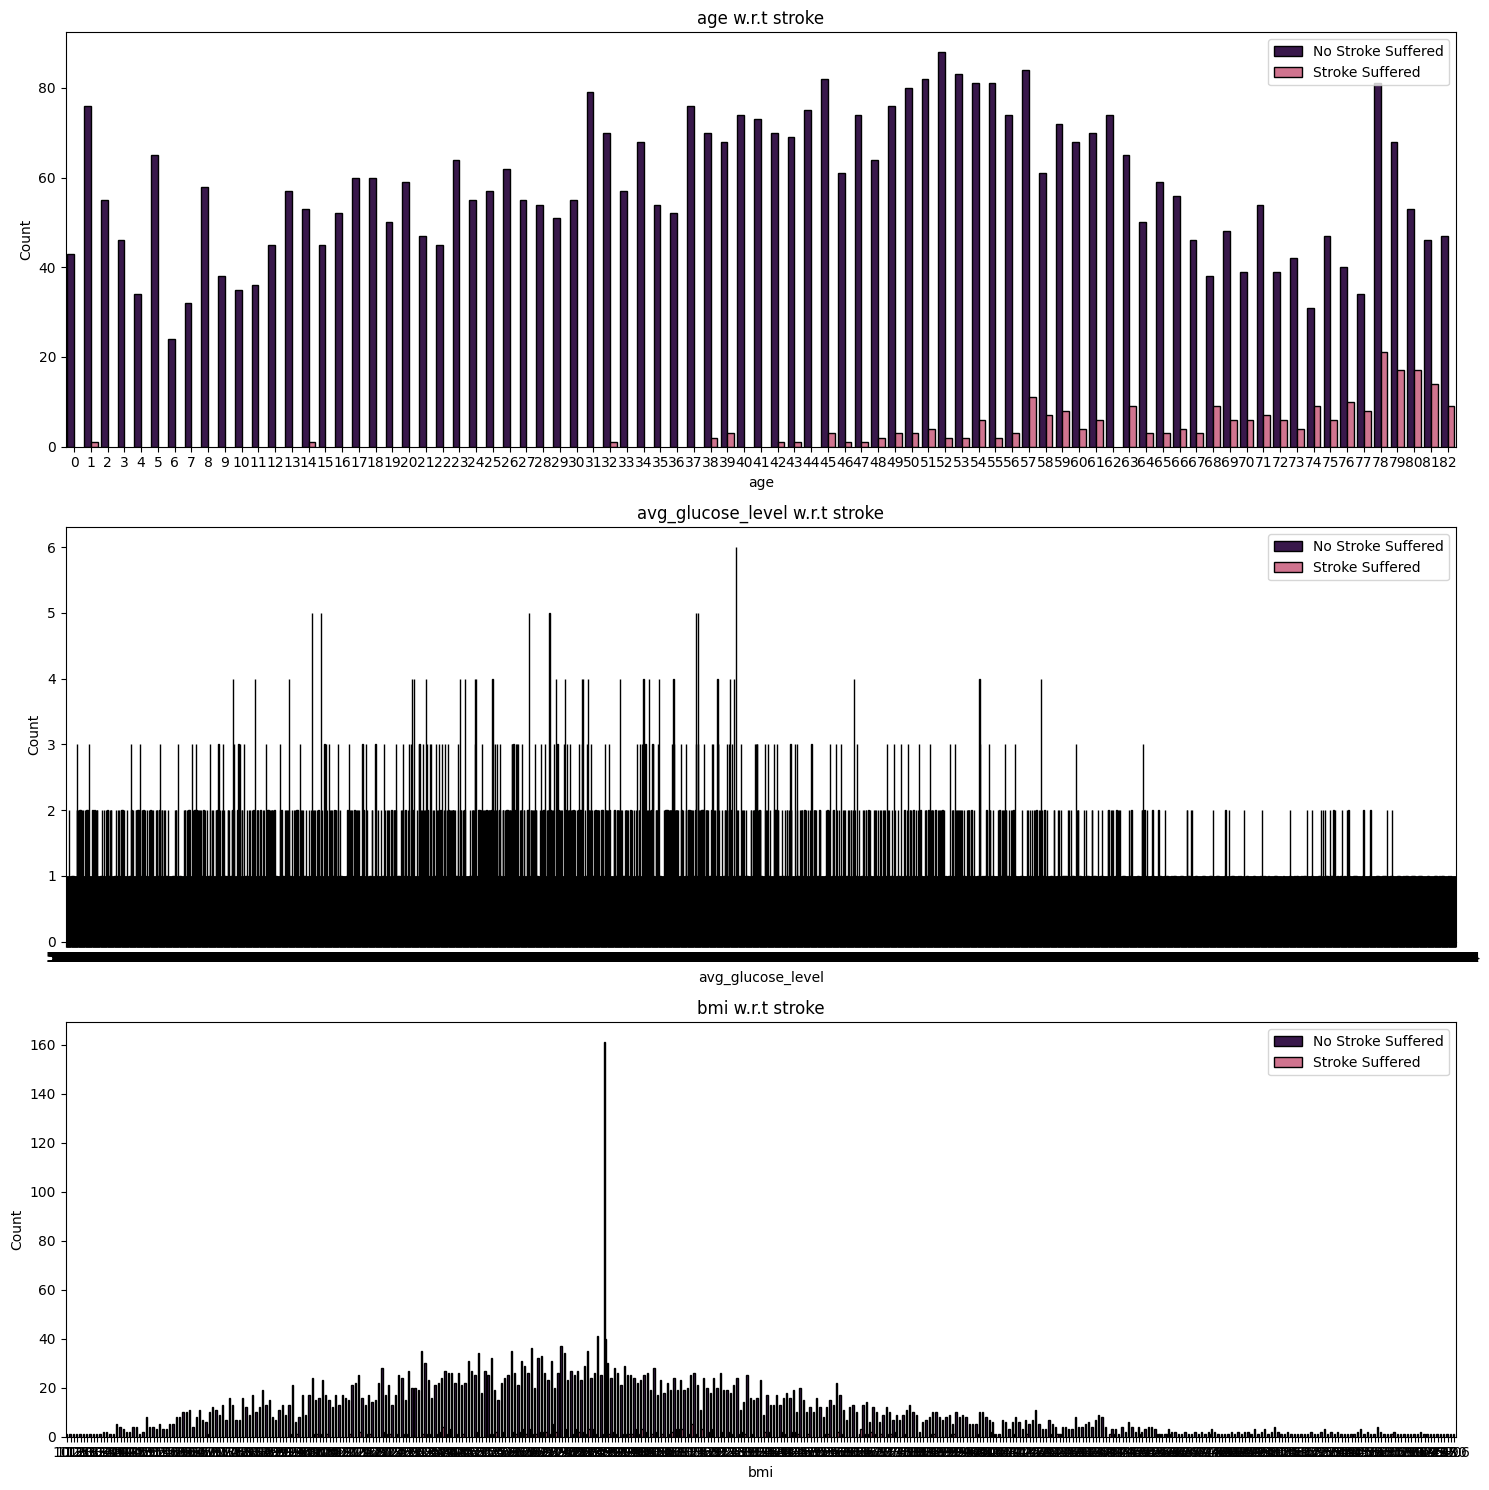

In [1313]:
# Создаем фигуру с тремя графиками
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Цикл для построения графиков
for i, feature in enumerate(discrete_features):
    # Проверяем, чтобы не выходить за пределы осей
    if i < len(axes):
        sns.countplot(
            x=feature,
            data=df1,
            hue="stroke",
            palette=colors,
            edgecolor='black',
            ax=axes[i]  # Используем конкретную ось
        )
        # Настройка легенды
        axes[i].legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
        # Заголовок графика
        title = feature + ' w.r.t stroke'
        axes[i].set_title(title)
        # Установка меток для лучшей читаемости
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

# Улучшаем layout для избежания наложений
plt.tight_layout()

# Показываем график один раз
plt.show()

- Из-за слишком большого количества уникальных значений в **дискретных признаках** сложно получить какие-либо значимые выводы. Поэтому мы преобразуем эти признаки в категориальные для визуализации.
- Мы масштабируем значения этих признаков к постоянному значению, которое представляет диапазон значений (например, среднее значение).
- Для этого мы делим значения на константу и присваиваем их целочисленное значение частного в качестве представительного постоянного значения. Масштабирующие константы выбираются на основе анализа данных и интуиции.

In [1188]:
df1['age_group'] = [ int(i / 5) for i in df1['age']]
df1['avg_glucose_level_group'] = [ int(i / 20) for i in df1['avg_glucose_level']]
df1['bmi_group'] = [ int(i / 5) for i in df1['bmi']]

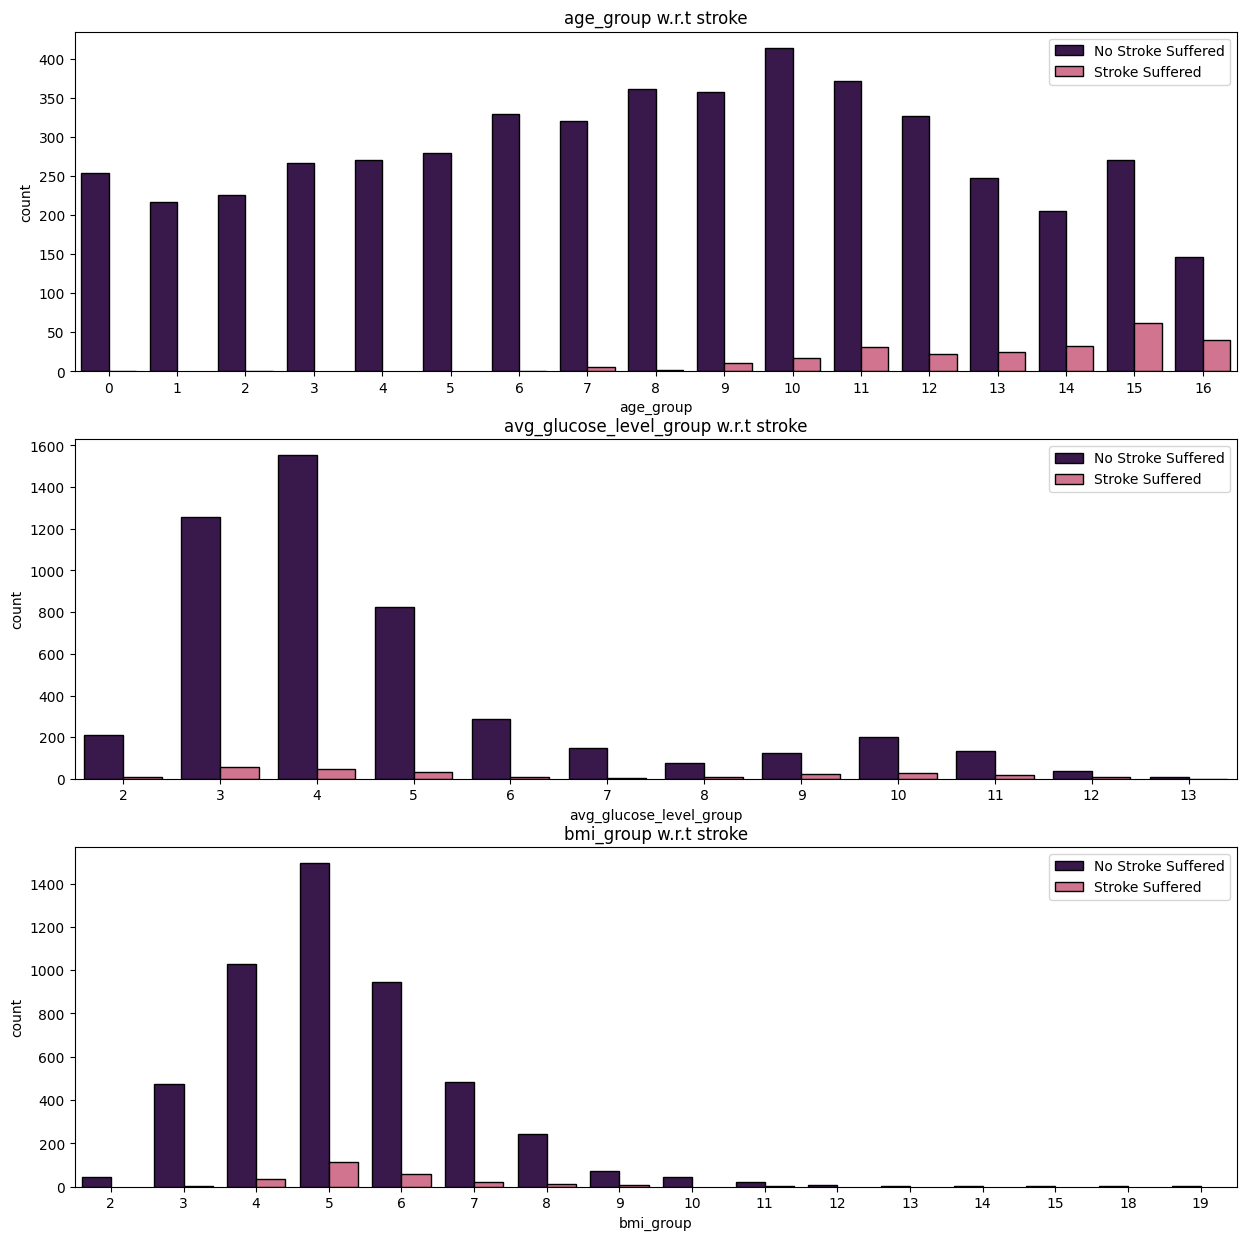

In [1189]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
group_numerical_features = [i + '_group' for i in ['age','avg_glucose_level','bmi']]

for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(x=group_numerical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'] ,loc = 'upper right')
    title = group_numerical_features[i] + ' w.r.t stroke'
    plt.title(title);
plt.show()

Для **возраста**, случаи перенесенного инсульта можно наблюдать в диапазоне значений от 35 (7×5) до 80 (16×5). Это не является доминирующим сегментом из-за несбалансированной природы набора данных.

Для **уровня среднего сахара в крови (avg_glucose_level)** можно выделить две группы: 60 (3×20) — 100 (5×20) и 180 (9×20) — 220 (11×20). Пациенты с уровнем среднего сахара в крови из первой группы более подвержены риску инсульта, чем пациенты из второй группы.

Значения **индекса массы тела (bmi)** в диапазоне от 15 (3×5) до 40 (8×5) продемонстрировали большее количество случаев инсульта.

### Категорийные признаки :

In [1192]:
categorical_features.remove('stroke')

- We remove the **stroke** feature from the list of categorical features as it is the target variable and we will treat it separately!

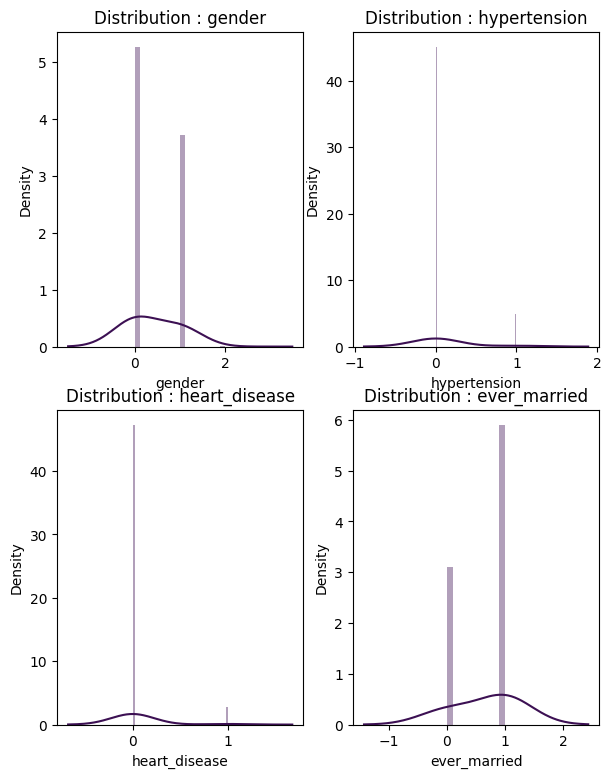

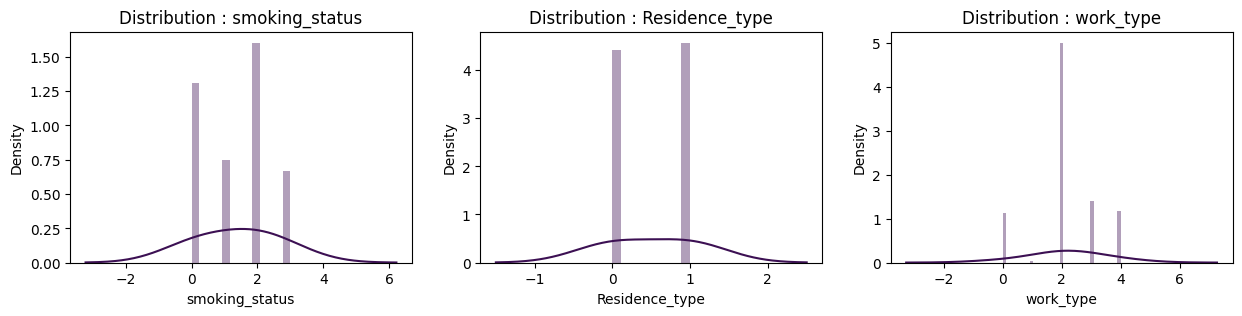

In [1194]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (7,9))
for i in range(len(categorical_features[:4])):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
plt.show()
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
plt.show()

Все категорийные значения **нормально распределены**.

### Категориальные признаки относительно целевой переменной (инсульт):

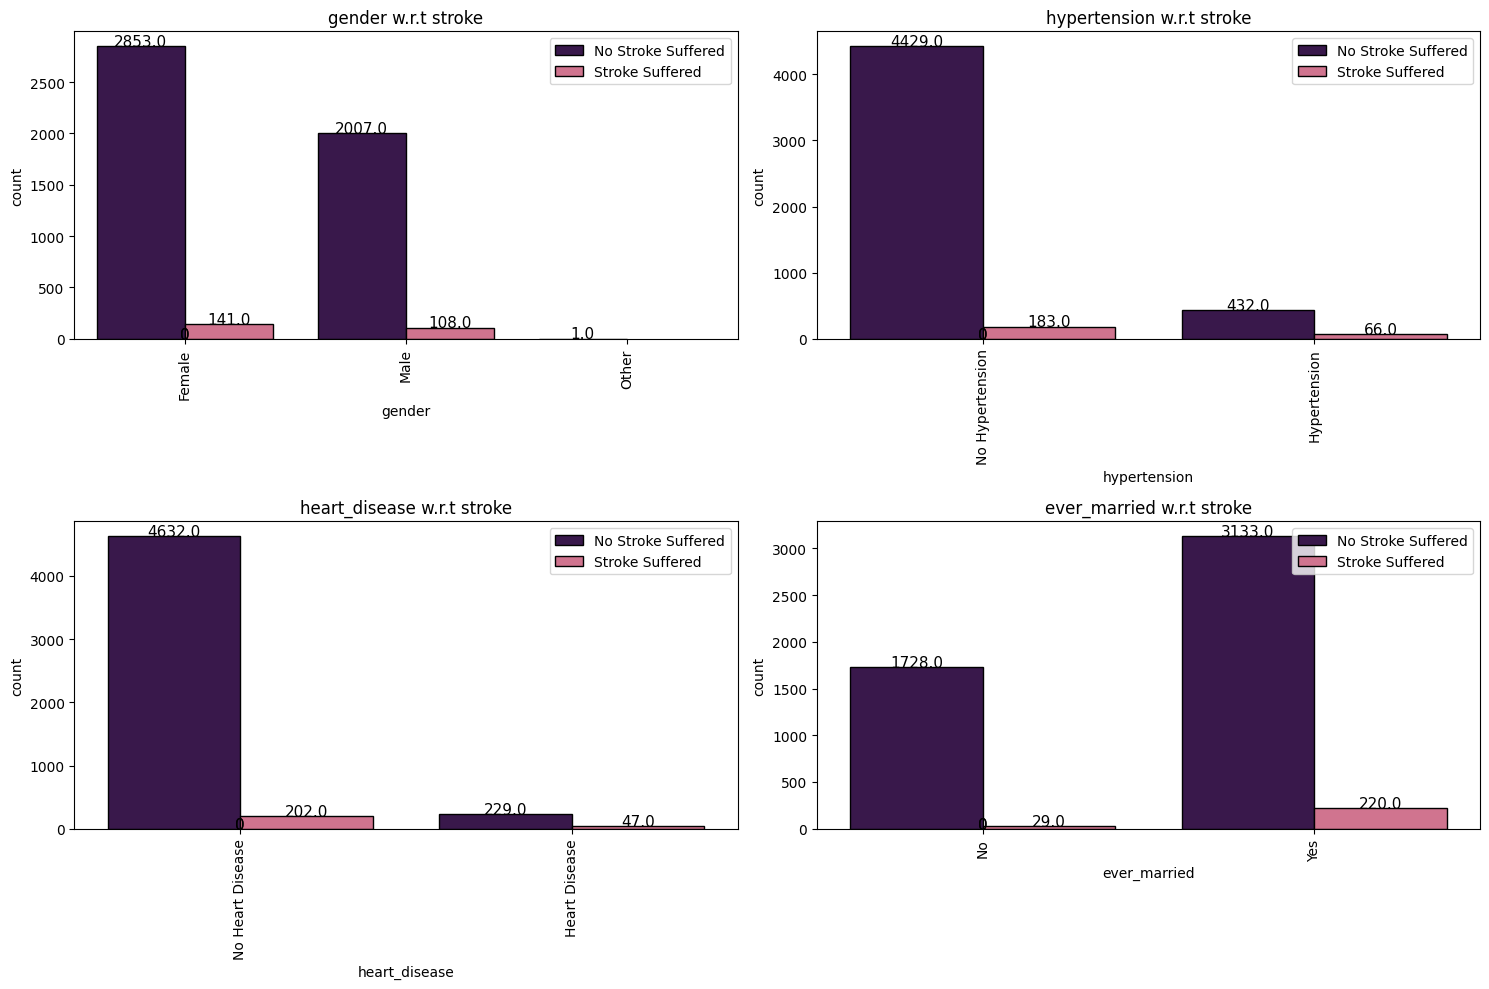

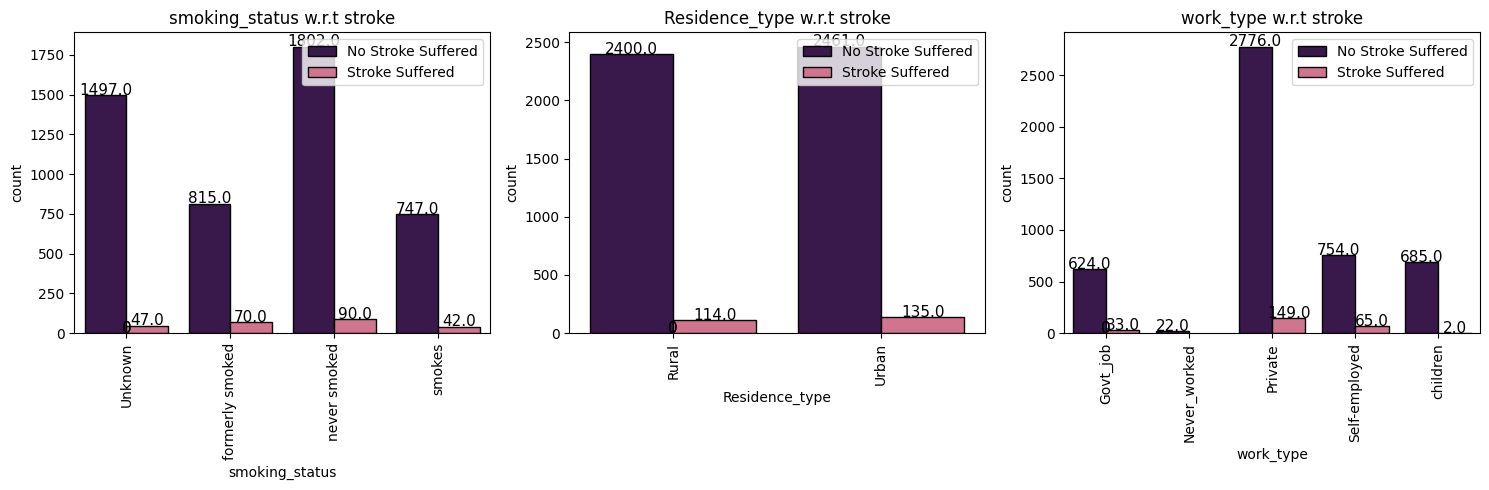

In [1197]:
# Первый блок графиков (2x2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i in range(4):
    ax = sns.countplot(
        x=categorical_features[i],
        data=df1,
        hue="stroke",
        palette=colors,
        edgecolor='black',
        ax=axes[i // 2, i % 2]  # Используем конкретную ось
    )
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 2,
            rect.get_height(),
            horizontalalignment='center',
            fontsize=11
        )
    # Поворот меток на оси X для лучшей читаемости
    ax.set_xticklabels(
        [tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())],
        rotation=90  # Поворот меток на 90 градусов
    )
    ax.legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Второй блок графиков (1x3)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i in range(-1, -4, -1):
    ax = sns.countplot(
        x=categorical_features[i],
        data=df1,
        hue="stroke",
        palette=colors,
        edgecolor='black',
        ax=axes[-i - 1]  # Используем конкретную ось
    )
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 2,
            rect.get_height(),
            horizontalalignment='center',
            fontsize=11
        )
    # Поворот меток на оси X для лучшей читаемости
    ax.set_xticklabels(
        [tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())],
        rotation=90  # Поворот меток на 90 градусов
    )
    ax.legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    ax.set_title(title)

plt.tight_layout()
plt.show()

- Все графики примерно демонстрируют одинаковый шаблон, а именно низкое количество случаев **инсульта**, и нет четкой причины, на которую можно было бы указать.  
- Удивительно, но население **женщин** зарегистрировало больше случаев **инсульта**, чем **мужчин**.
- Интересно отметить, что люди **без гипертонии** и **без болезней сердца** оказались более подвержены риску **инсульта**, чем те, кто имеет эти медицинские условия.
- Согласно набору данных, люди, которые **в браке**, перенесли **инсульт** чаще, чем те, кто никогда не был женат/замужем.
- Что касается **статуса курения**, то люди, которые **никогда не курили**, лидируют по количеству случаев **инсульта**, а на втором месте — те, кто **раньше курил**.
- Из **типа проживания** и **вида занятости** сложно извлечь много информации, однако работники в **частном секторе** перенесли больше случаев **инсульта**, чем представители других типов занятости.

### Категориальные признаки относительно подтвержденных случаев инсульта:

In [1200]:
gender = df1[df1['stroke'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

hypertension = df1[df1['stroke'] == 1]['hypertension'].value_counts()
hypertension = [hypertension[0] / sum(hypertension) * 100, hypertension[1] / sum(hypertension) * 100]

heart_disease = df1[df1['stroke'] == 1]['heart_disease'].value_counts()
heart_disease = [heart_disease[0] / sum(heart_disease) * 100, heart_disease[1] / sum(heart_disease) * 100]

ever_married = df1[df1['stroke'] == 1]['ever_married'].value_counts()
ever_married = [ever_married[0] / sum(ever_married) * 100, ever_married[1] / sum(ever_married) * 100]

work_type = df1[df1['stroke'] == 1]['work_type'].value_counts()
work_type = [work_type[0] / sum(work_type) * 100, work_type[2] / sum(work_type) * 100,
             work_type[3] / sum(work_type) * 100, work_type[4] / sum(work_type) * 100,]

Residence_type = df1[df1['stroke'] == 1]['Residence_type'].value_counts()
Residence_type = [Residence_type[0] / sum(Residence_type) * 100, Residence_type[1] / sum(Residence_type) * 100]

smoking_status = df1[df1['stroke'] == 1]['smoking_status'].value_counts()
smoking_status = [smoking_status[0] / sum(smoking_status) * 100, smoking_status[1] / sum(smoking_status) * 100,
                  smoking_status[2] / sum(smoking_status) * 100, smoking_status[3] / sum(smoking_status) * 100]

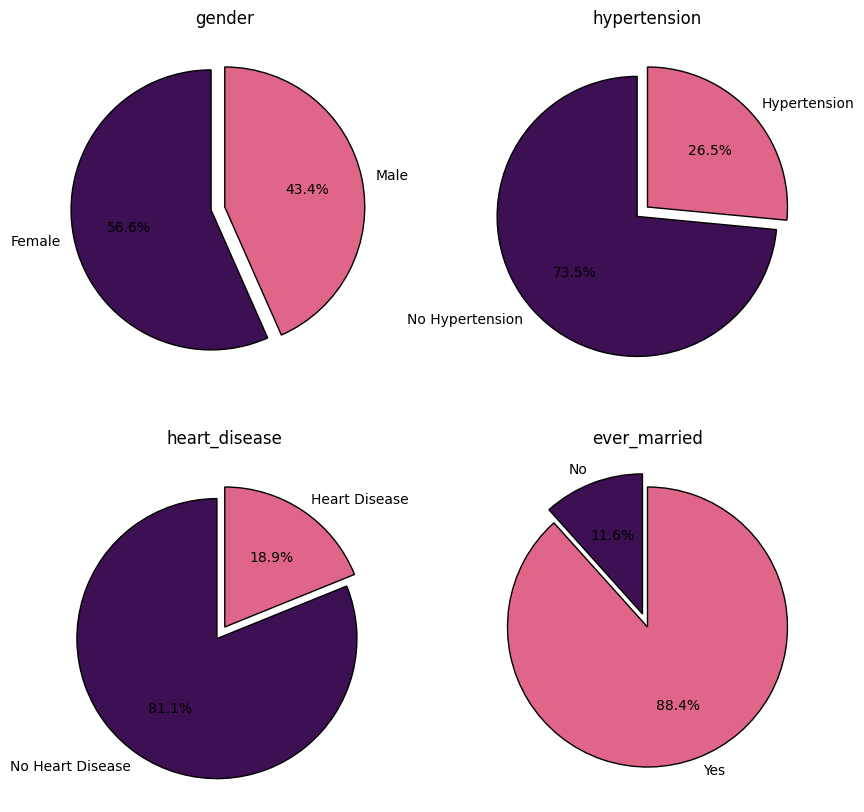

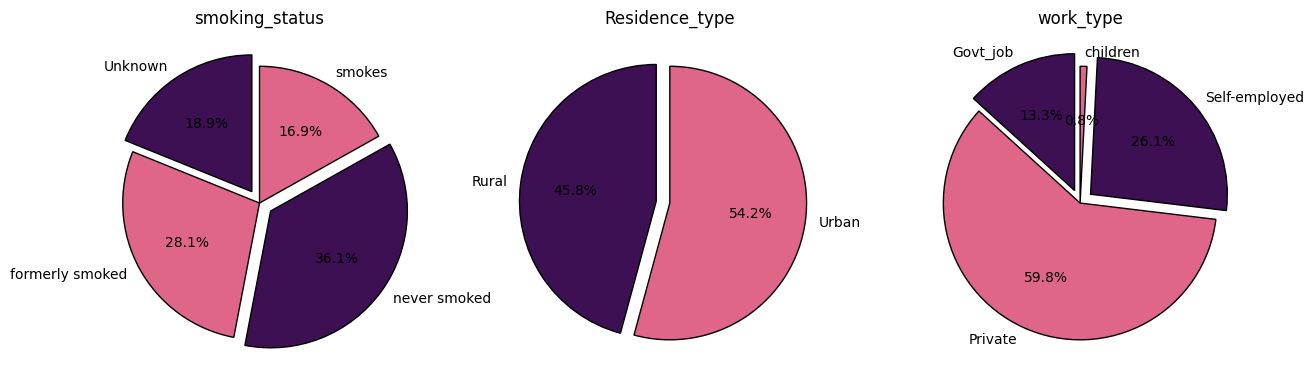

In [1201]:
l1 = [gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status]

ax,fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(4):
    if len(l1[i]) == 2:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
plt.show()
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(-1,-4,-1):
    if len(l1[i]) == 2:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
plt.show()

- Согласно данным, население **женщин** более подвержено риску **инсульта**.
- Из приведенных визуализаций удивительно, что случаи **инсульта** чаще встречались у пациентов, **не имеющих никаких медицинских условий, таких как болезни сердца или гипертония**!
- Люди, которые **в браке**, имеют наибольшую вероятность перенести **инсульт**.
- Что касается **инсульта и статуса курения**, то люди, которые **никогда не курили**, наиболее подвержены риску. За ними следуют те, кто **раньше курил**. Удивительно, но люди, которые **курят**, имеют наименьшие шансы **перенести инсульт**.
- Люди, проживающие в **городской местности (Urban Residence Type)**, по количеству случаев **инсульта** немного опередили тех, кто живет в **сельской местности (Rural Residence Type)**.
- В разрезе **вида занятости (work_type)**, сотрудники **частных компаний (Private)** зарегистрировали более **50%+** случаев **инсульта**. За ними следуют **самозанятые (Self-employed)** и те, кто работает на **государственной службе (Govt_job)**, которые зафиксировали соответственно половину и четверть случаев по сравнению с теми, что были зарегистрированы среди работников **частного сектора**.ра**.

### Категориальные признаки vs Дискретные признаки относительно Целевой переменной (инсульт):

пол / дискретные признаки

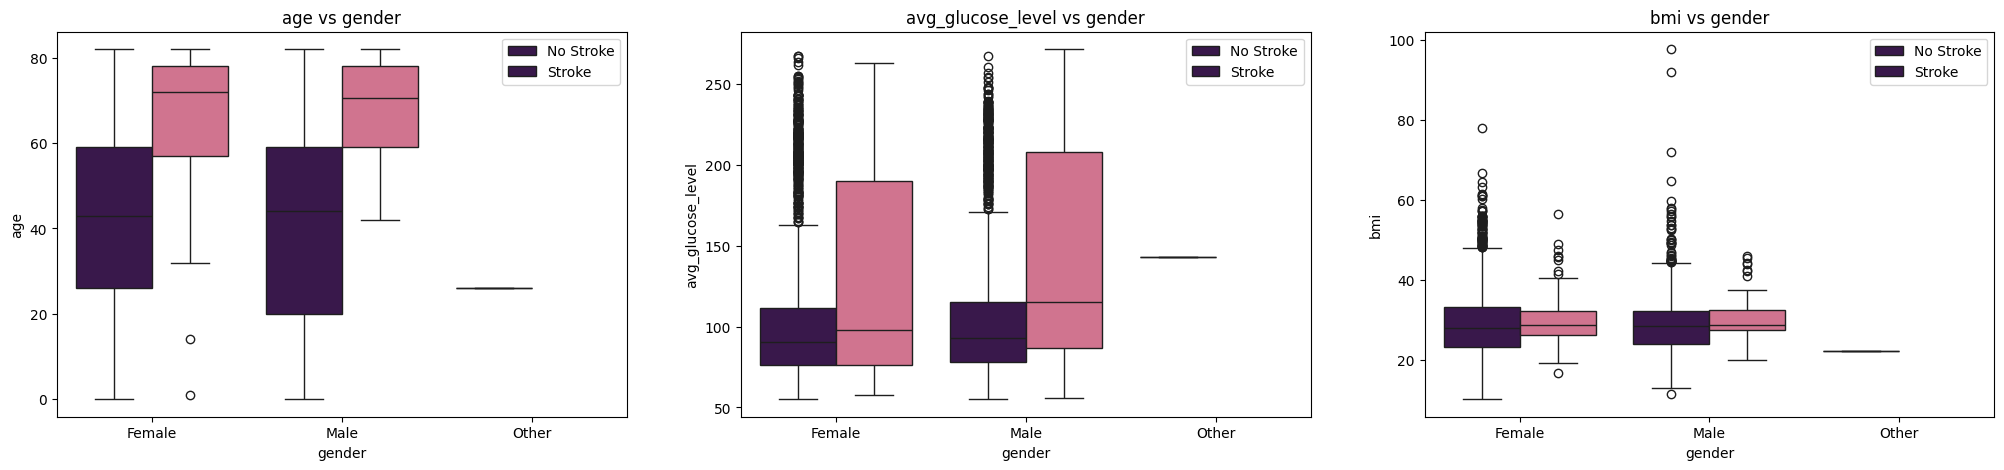

In [1205]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'gender',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['gender'][j] for j in sorted(df1['gender'].unique())])
    title = discrete_features[i] + ' vs gender'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);
plt.show()

- Для обоих полов — **мужчин** и **женщин** — возраст тех, кто **перенес инсульт**, составляет **60+** лет.
- Для большинства значений **уровня среднего сахара в крови (avg_glucose_level)**, оба пола зарегистрировали значительное количество случаев **инсульта**.
- Для мужского населения нижняя граница значений **индекса массы тела (bmi)** немного выше, чем для женского. В целом, представители обоих полов пересекаются по одинаковым значениям **BMI** в случаях **инсульта**.

#### повышенное давление vs дискретные признаки:

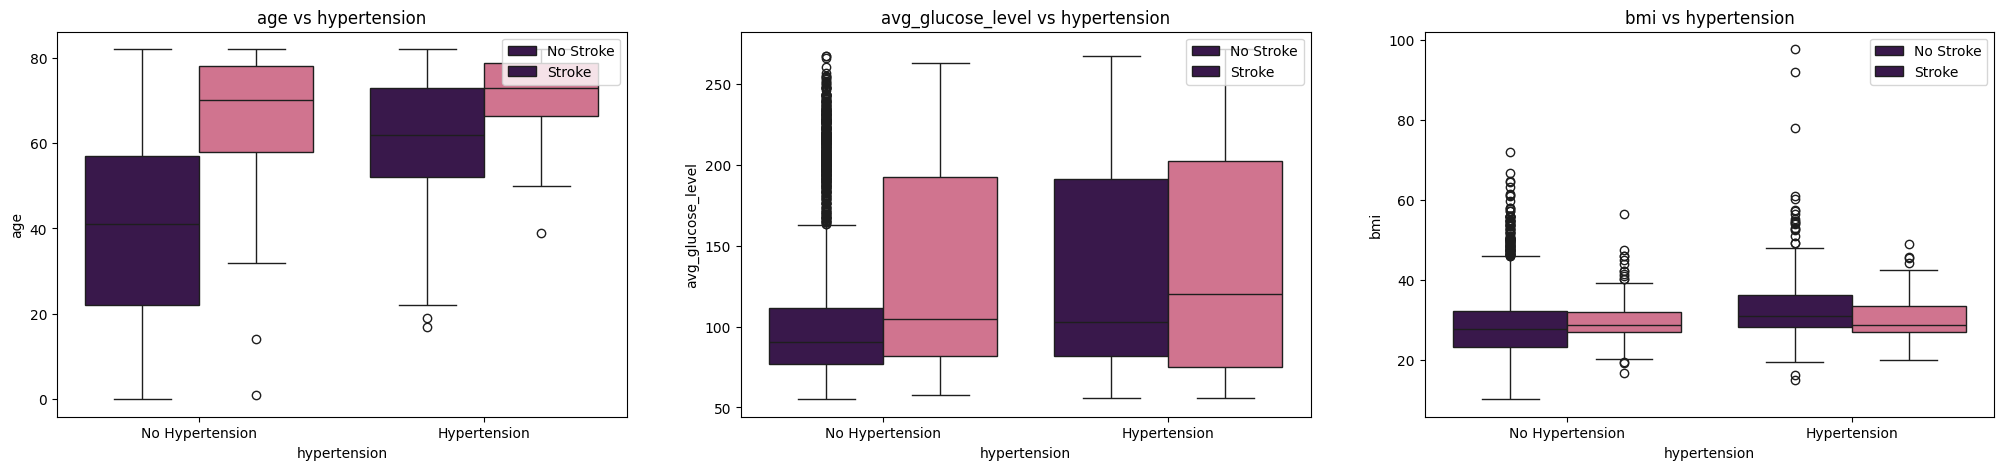

In [1208]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'hypertension',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['hypertension'][j] for j in sorted(df1['hypertension'].unique())])
    title = discrete_features[i] + ' vs hypertension'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);
plt.show()

Странным образом, случаи инсульта у людей с гипертонией имеют более высокую нижнюю границу возраста (60+), по сравнению с теми, кто не страдает гипертонией.  

Что касается **гипертонии и уровня среднего сахара в крови (avg_glucose_level)**, то случаи инсульта и отсутствия инсульта примерно совпадают по значениям.  

В результате наличия гипертонии нижние границы значений **индекса массы тела (bmi)** немного снижаются, что делает людей более подверженными риску инсульта.

#### Сердечные заболевания vs Дискретные признаки:

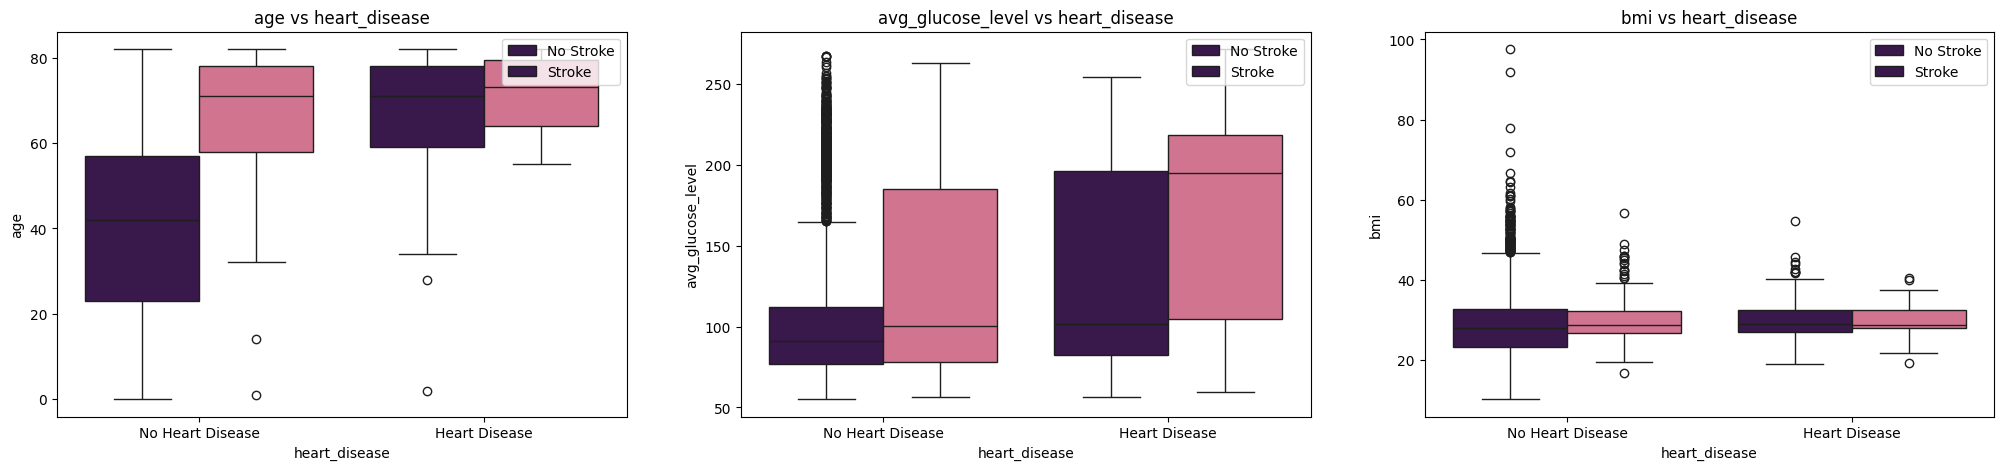

In [1211]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'heart_disease',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['heart_disease'][j] for j in sorted(df1['heart_disease'].unique())])
    title = discrete_features[i] + ' vs heart_disease'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);
plt.show()

- Graphs of **hypertension** & **heart_disease** against discrete features are very similar with slight differences.
- They share the same effects on **stroke**.

#### семейный статус vs дискретные признаки :

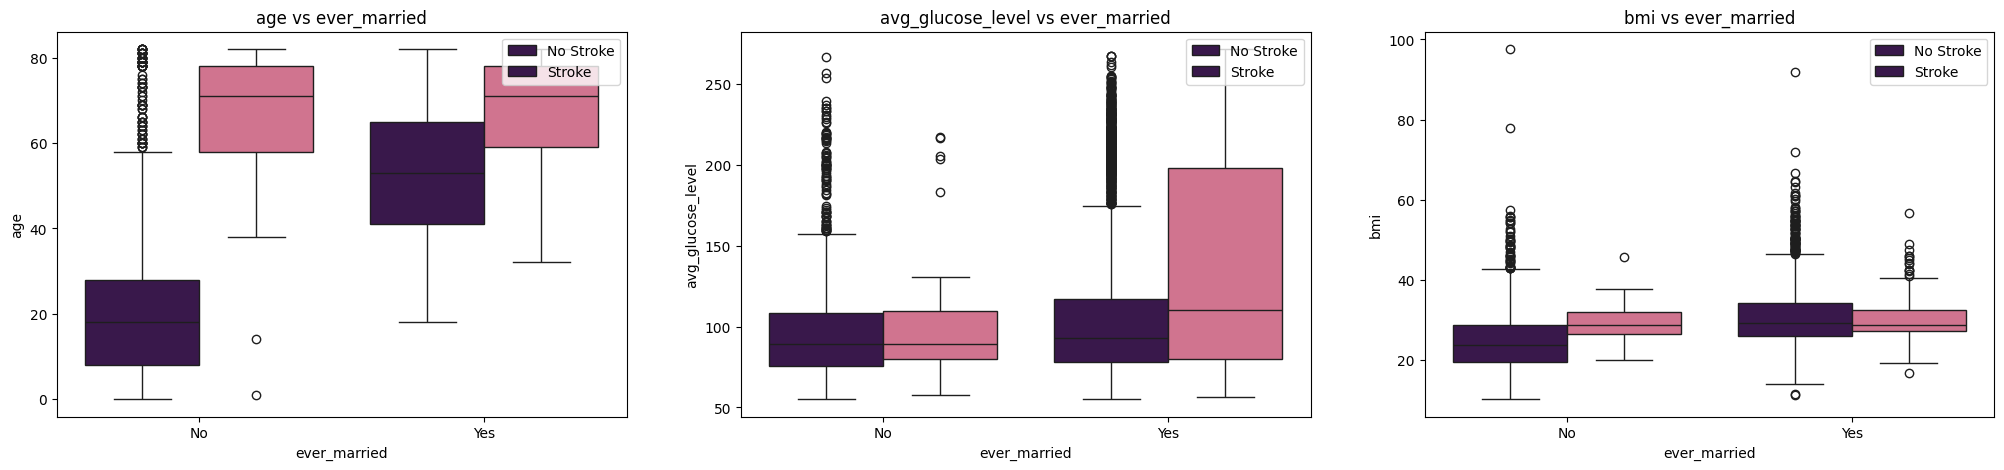

In [1214]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'ever_married',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['ever_married'][j] for j in sorted(df1['ever_married'].unique())])
    title = discrete_features[i] + ' vs ever_married'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);
plt.show()

- При анализе **был ли брак (ever_married) vs дискретные признаки** можно обнаружить повторяющиеся закономерности.
- Люди, которые **вступали в брак**, продемонстрировали случаи **инсульта** практически для всех значений **уровня среднего сахара в крови (avg_glucose_level)**.

#### тип работы vs дискретные признаки :

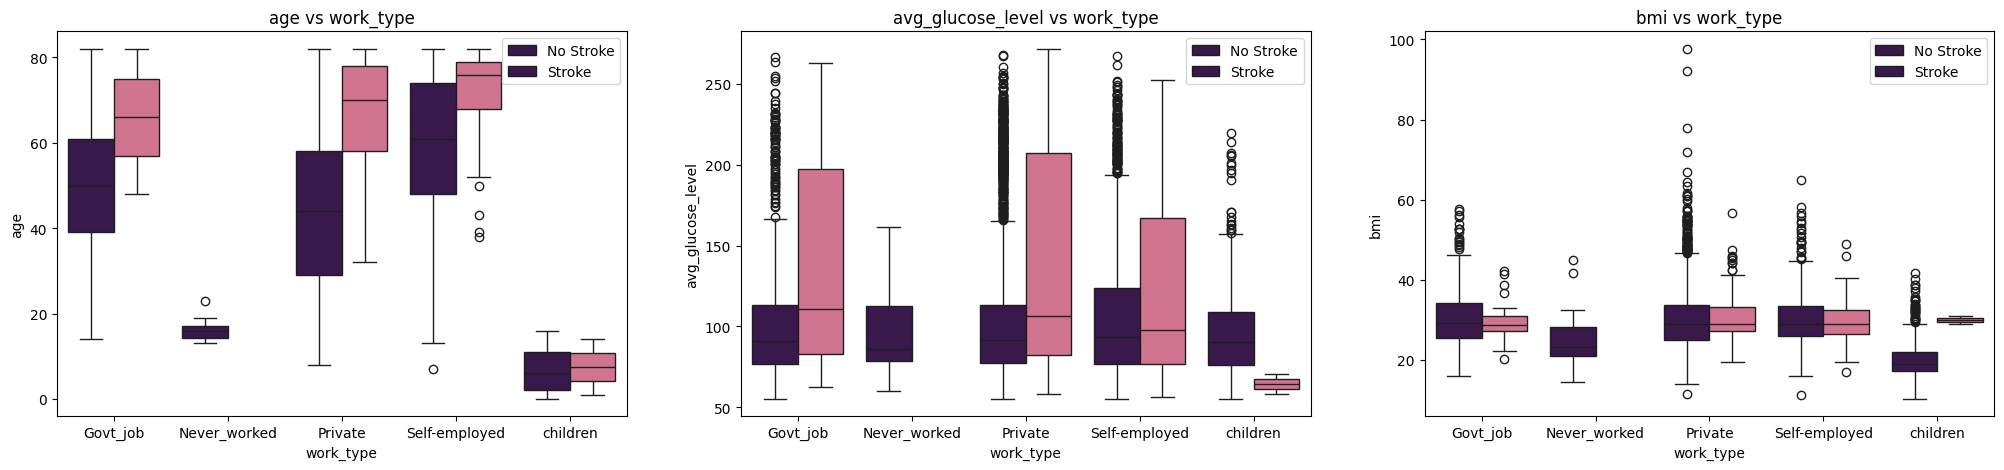

In [1217]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'work_type',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['work_type'][j] for j in sorted(df1['work_type'].unique())])
    title = discrete_features[i] + ' vs work_type'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);
plt.show()

- Независимо от **типа занятости (work_type)**, случаи **инсульта** были зафиксированы у людей в возрасте **60+**, за исключением категории **дети**.
- Очевидно, что люди, которые работали для заработка на жизнь, перенесли **инсульт**.
- Случаи **инсульта** чаще наблюдались у людей, занимающихся наймом на работу, то есть у тех, кто работает на **государственной службе (Govt_job)** или в **частном секторе (Private)**, по сравнению с **самозанятыми (Self-employed)**.

#### Тип проживания vs дискретные признаки:

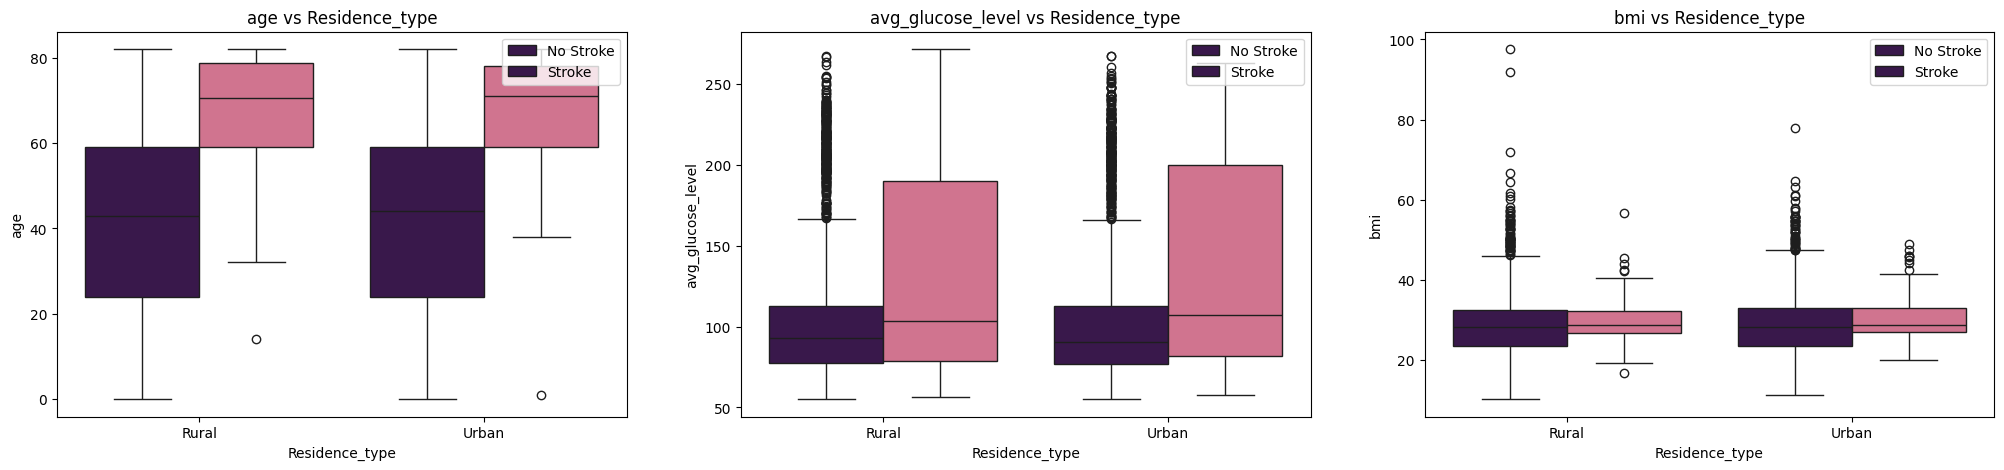

In [1220]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'Residence_type',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['Residence_type'][j] for j in sorted(df1['Residence_type'].unique())])
    title = discrete_features[i] + ' vs Residence_type'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);
plt.show()

- Графики для **сельского типа проживания (Rural Residence_type)** и **городского типа проживания (Urban Residence_type)** в сравнении с дискретными признаками относительно **инсульта** идентичны.
- Их невозможно разделить друг от друга. Они повторяют те закономерности, которые были подчеркнуты ранее.

#### курение vs дискретные признаки :

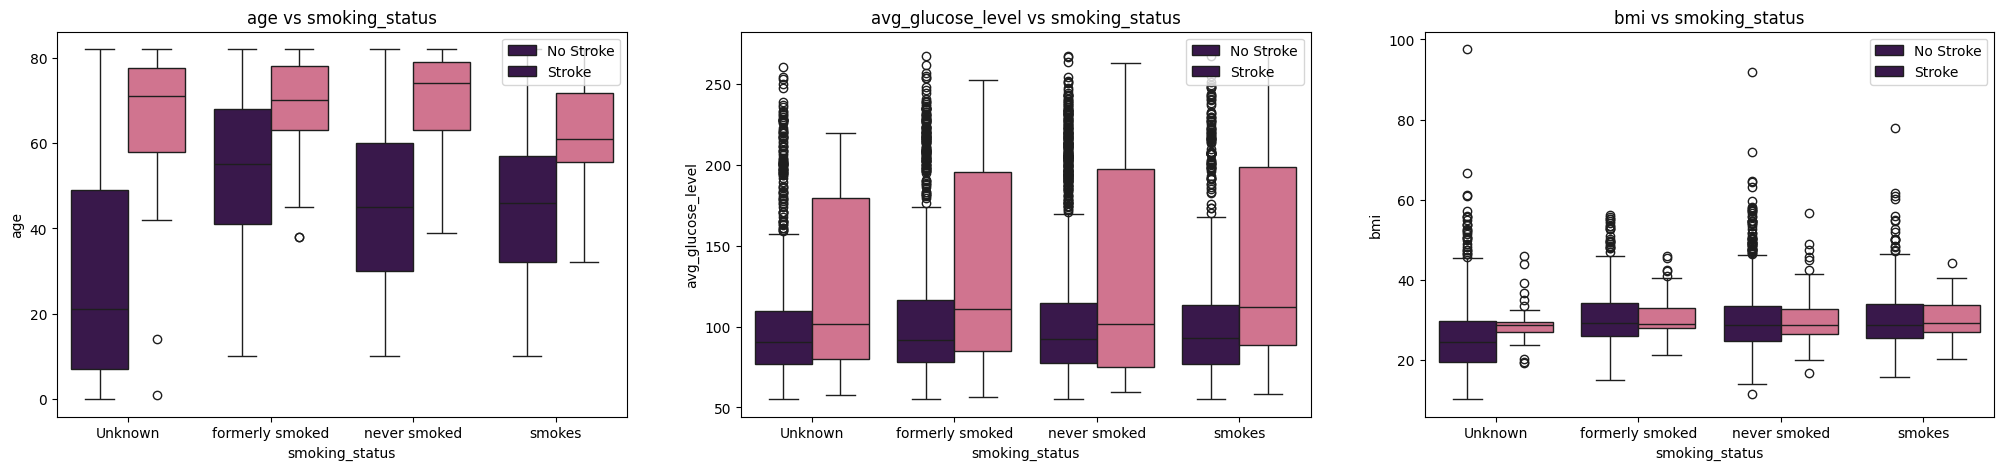

In [1223]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'smoking_status',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['smoking_status'][j] for j in sorted(df1['smoking_status'].unique())])
    title = discrete_features[i] + ' vs smoking_status'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);
plt.show()

- Независимо от **статуса курения (smoking_status)**, люди, **перенесшие инсульт**, были выявлены в возрасте около **60 лет**.
- Аналогично **возрасту**, одинаковые значения **уровня среднего сахара в крови (avg_glucose_level)** наблюдались в случаях **инсульта**, независимо от **статуса курения**.
- Однако из-за **статуса курения** диапазон значений, для которых регистрируются случаи **инсульта**, отличается. Диапазон значений у людей, которые **курят**, немного выше, чем у остальных.

### Дискретные признаки vs Дискретные признаки относительно Целевой переменной (инсульт):

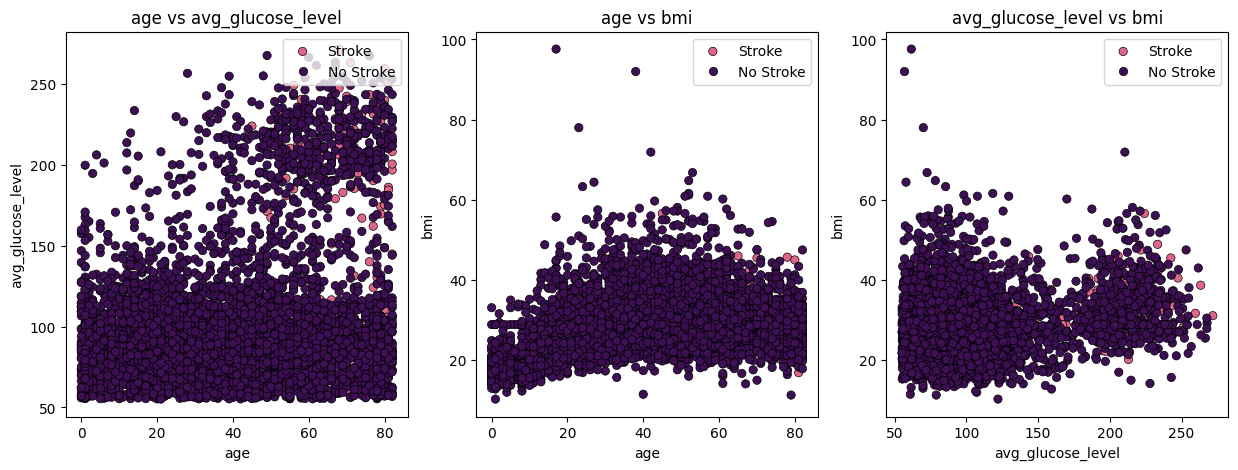

In [1226]:
a = 0
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5),squeeze = False)
for i in range(len(discrete_features) - 1):
    for j in range(len(discrete_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(1,3,a)
            sns.scatterplot(x = discrete_features[i],y = discrete_features[j],data = df1,hue = 'stroke',palette = colors,edgecolor = 'black');
            title = discrete_features[i] + ' vs ' + discrete_features[j]
            plt.legend(['Stroke', 'No Stroke'], loc = 'upper right',)
            plt.title(title)

plt.show()

- Из-за несбалансированной природы данных, случаи **инсульта** и **отсутствия инсульта** невозможно разделить.
- Из приведенных выше графиков невозможно получить какие-либо выводы.



Порядок / Значения признаков для подтвержденных случаев инсульта:

#### Категориальные признаки (Порядок):
- **пол (gender)**: женский > мужской  
- **гипертония (hypertension)**: без гипертонии > с гипертонией  
- **болезни сердца (heart_disease)**: без болезней сердца > с болезнями сердца  
- **семейное положение (ever_married)**: в браке > не в браке  
- **вид занятости (working_type)**: частный сектор > самозанятые > государственная служба > дети  
- **тип проживания (Residence_type)**: городская местность > сельская местность  
- **статус курения (smoking_status)**: никогда не курил > бросил курить > курит  

#### Дискретные признаки (Диапазон):
- **возраст (age)**: 55–80 лет  
- **уровень среднего сахара в крови (avg_glucose_level)**: 80–200 единиц  
- **индекс массы тела (bmi)**: 20–40  

Согласно данным, эти порядки / диапазоны значений приводят к случаям инсульта.

- **Категориальные признаки (Порядок):**

    - **пол (gender)**: мужской > женский  
    - **гипертония (hypertension)**: гипертония > без гипертонии  
    - **болезни сердца (heart_disease)**: болезни сердца > без болезней сердца  
    - **семейное положение (ever_married)**: в браке = не в браке  
    - **вид занятости (working_type)**: стресс, связанный с работой, может привести к инсульту.  
    - **тип проживания (Residence_type)**: смертность от инсульта выше в сельских районах, чем в городских, из-за недостаточного медицинского обслуживания.  
    - **статус курения (smoking_status)**: курение увеличивает риск инсульта.

- **Дискретные признаки (Диапазон):**

    - **возраст (age)**: Вероятность инсульта примерно удваивается каждые 10 лет после 55 лет.  
    - **уровень среднего сахара в крови (avg_glucose_level)**: Высокий уровень сахара в крови часто наблюдается в случаях инсульта. Часто фиксируется значение 126+.  
    - **индекс массы тела (bmi)**: Высокие значения ИМТ увеличивают вероятность ишемического инсульта.

- Вся указанная информация собрана с веб-сайтов и научных статей. Мы будем использовать эту информацию для сверки с обобщением анализа данных (EDA) и выбором признаков.

- Выводы, полученные в результате анализа данных (EDA), противоречат специализированной информации (Domain Information) для признаков: **гипертония**, **болезни сердца** и **статус курения**.

- Разница, скорее всего, возникает из-за **несбалансированности датасета**!

- Следовательно, мы проведем процесс инженерной обработки признаков, сбалансируем датасет с помощью **анализа SMOTE** и передадим сбалансированные данные алгоритмам машинного обучения.

- Датасет **несбалансирован** с преобладанием случаев **отсутствия инсульта** в соотношении **19:1** для категорий **нет инсульта : инсульт**. Сначала мы сбалансируем датасет с помощью **анализа SMOTE**!
  
- Для работы с несбалансированными данными существует два варианта:
    - **Уменьшение выборки (Undersampling)**: Уменьшить количество примеров большинства класса целевой переменной.
    - **Увеличение выборки (Oversampling)**: Увеличить количество примеров меньшинства класса до уровня большинства класса.

- Для достижения наилучших результатов рекомендуется использовать комбинацию уменьшения и увеличения выборки.
- Сначала мы выполним уменьшение выборки для большинства класса, а затем проведем увеличение выборки для меньшинства класса.
- Для балансировки данных мы будем использовать библиотеку **imblearn**.
- **Команда для установки через PIP**: `pip install imbalanced-learn`

### Балансировка данных с SMOTE :

In [1232]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [1233]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,:'smoking_status']
t1 = df1.loc[:,'stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 2490, 1: 2490})

Расчет для балансировки данных:

**Стратегия выборки (Sampling Strategy):** Это соотношение, которое является общим параметром как для увеличения, так и для уменьшения выборки.  
**Формула стратегии выборки:**  
\( \text{Стратегия выборки} = \frac{\text{Количество примеров меньшинства}}{\text{Количество примеров большинства}} \)

В данном случае:  
- Класс большинства: **Нет инсульта (No Stroke)** — 4861 пример  
- Класс меньшинства: **Инсульт (Stroke)** — 249 примеров  

### Шаг 1: Уменьшение выборки (Undersampling)
- **Стратегия выборки (Sampling_Strategy) = 0.1**  
\( 0.1 = \frac{249}{\text{Количество примеров большинства}} \)  
После уменьшения выборки:  
- Класс большинства: **Нет инсульта (No Stroke)** — 2490 примеров  
- Класс меньшинства: **Инсульт (Stroke)** — 249 примеров  

### Шаг 2: Увеличение выборки (Oversampling)
- **Стратегия выборки (Sampling_Strategy) = 1**  
\( 1 = \frac{\text{Количество примеров меньшинства}}{2490} \)  
После увеличения выборки:  
- Класс большинства: **Нет инсульта (No Stroke)** — 2490 примеров  
- Класс меньшинства: **Инсульт (Stroke)** — 2490 примеров  

### Итоговое распределение классов:
- Класс большинства: **Нет инсульта (No Stroke)** — 2490 примеров  
- Класс меньшинства: **Инсульт (Stroke)** — 2490 примеров  

Здесь мы сбалансировали данные, сначала уменьшив количество примеров в группе большинства, а затем увеличив количество примеров в группе меньшинства до уровня группы большинства.

Для несбалансированных датасетов мы дублируем данные, чтобы справиться с потенциальным смещением в прогнозах. Из-за процесса дублирования мы используем синтетические данные для моделирования, чтобы обеспечить, что прогнозы не будут склоняться в сторону класса большинства.

Таким образом, оценка моделей с использованием точности (accuracy) будет вводящей в заблуждение. Вместо этого мы будем использовать **матрицу ошибок (confusion matrix)**, **график ROC-AUC** и **показатель ROC-AUC** для оценки модели.

In [1235]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

In [1236]:
x_train_test = x_train.copy(deep = True)
x_train_test['stroke'] = y_train

### Модель

In [1238]:
!pip install scikit-learn

In [1239]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [1240]:
x_train1, x_test1, y_train1, y_test1 = x_train.values, x_test.values, y_train.values, y_test.values



Разделение на **85 - 15 train - test** группы.

In [1242]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### XGBoostClassifier :

Сначала проверим одну из моделей

In [1244]:
from xgboost import XGBClassifier

In [1245]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

#### Model for No Data Leakage :

Cross Validation Score :  93.08%
ROC_AUC Score :  86.43%


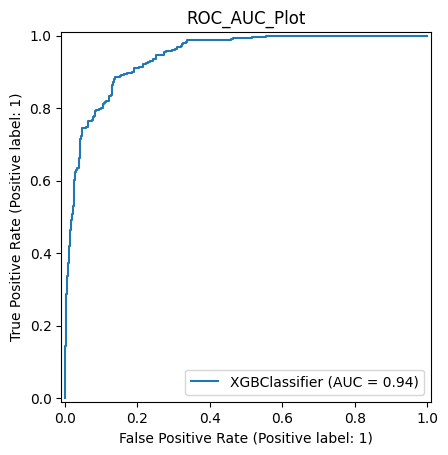

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       367
           1       0.85      0.89      0.87       380

    accuracy                           0.86       747
   macro avg       0.87      0.86      0.86       747
weighted avg       0.87      0.86      0.86       747



In [1247]:
model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)

Это неплохие показатели для наших целей, проанализируем и другие модели для сравнения, а затем возьмем лучшую

In [1249]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Создаём модели
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "XGBoost": XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)
}

# Обучение и оценка моделей
results = {}

for name, model in models.items():
    print(f"Обучение {name}...")
    model.fit(x_train1, y_train1)
    y_pred = model.predict(x_test1)
    
    roc_auc = roc_auc_score(y_test1, y_pred)
    precision = precision_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    
    results[name] = {"ROC AUC": roc_auc, "Precision": precision, "Recall": recall}

print("Результаты моделей:")
df_results = pd.DataFrame(results).T
print(df_results)


Обучение Random Forest...
Обучение Gradient Boosting...
Обучение Logistic Regression...
Обучение XGBoost...
Результаты моделей:
                     ROC AUC  Precision  Recall
Random Forest           0.82       0.79    0.89
Gradient Boosting       0.87       0.86    0.89
Logistic Regression     0.81       0.81    0.82
XGBoost                 0.86       0.85    0.89


Я предварительно загрузил модель (лучшей оказалась Gradient Boosting) в файл model.pkl, здесь мы ее просто импортируем

In [1251]:
import joblib

# Сохранение модели в файл model.pkl
# joblib.dump(model, "model.pkl")
# print("Модель успешно сохранена в файл model.pkl")

# Загрузка модели
loaded_model = joblib.load("model.pkl")
print("Модель успешно загружена")

Модель успешно загружена


In [1316]:
import numpy as np
import pandas as pd

# Предположим, что df1 — это DataFrame, содержащий все данные, а x_train1 — это numpy-массив.
# Получаем средние значения для числовых столбцов из исходного DataFrame
mean_age = df1["age"].mean()
mean_glucose = df1["avg_glucose_level"].mean()
mean_bmi = df1["bmi"].mean()

# Получаем модальные значения (самые частые) для категориальных признаков
most_common_gender = df1["gender"].mode()[0]

most_common_work = df1["work_type"].mode()[0]

most_common_residence = df1["Residence_type"].mode()[0]

most_common_smoking = df1["smoking_status"].mode()[0]

def safe_input(prompt, default_value, value_type):
    """
    Запрашивает ввод у пользователя. Если введено пустое значение (Enter), возвращает default_value.
    Если тип value_type - число, проверяет корректность ввода.
    """
    while True:
        user_input = input(prompt).strip()
        if user_input == "":  # Если нажали Enter
            return default_value
        try:
            return value_type(user_input)  # Преобразуем в нужный тип
        except ValueError:
            print("Некорректный ввод. Попробуйте ещё раз.")

def get_patient_data():
    """
    Запрашивает у пользователя ввод данных пациента, подставляя средние значения при отсутствии ввода.
    """
    print("\nВведите данные пациента (нажмите Enter, чтобы использовать средние значения)\n")

    gender = input("Пол (Мужчина/Женщина): ").strip().capitalize() or most_common_gender
    age = safe_input(f"Возраст: ", mean_age, float)
    hypertension = safe_input("Гипертония (0 - нет, 1 - да): ", 0, int)
    heart_disease = safe_input("Болезни сердца (0 - нет, 1 - да): ", 0, int)
    ever_married = safe_input("Был(а) женат(а)? (0 - нет, 1 - да): ", 0, int)
    work_type = input("Тип работы (Я ребенок/Госслужащий/Никогда не работал/Негосударственная работа/Самозанятый): ").strip().capitalize() or most_common_work
    residence_type = input("Тип проживания (Город/Село): ").strip().capitalize() or most_common_residence
    avg_glucose_level = safe_input(f"Средний уровень глюкозы (по умолчанию {mean_glucose:.1f}): ", mean_glucose, float)
    bmi = safe_input(f"Индекс массы тела: ", mean_bmi, float)
    smoking_status = input("Статус курения (Ранее курил/Никогда не курил/Курю/Неизвестно): ").strip().capitalize() or most_common_smoking

    # Словари перевода
    gender_map = {"Мужчина": 1, "Женщина": 0}
    residence_map = {"Город": 1, "Село": 0}
    work_type_map = {"Я ребенок": 0, "Госслужащий": 1, "Никогда не работал": 2, "Негосударственная работа": 3, "Самозанятый": 4}
    smoking_status_map = {"Ранее курил(а)": 0, "Никогда не курил(а)": 1, "Курю": 2, "Неизвестно": 3}

    # Преобразуем ввод пользователя в числовой формат
    patient_data = np.array([[
        gender_map.get(gender, most_common_gender),  # Если ввод неверный, ставим самое частое значение
        age,
        hypertension,
        heart_disease,
        ever_married,
        work_type_map.get(work_type, most_common_work),
        residence_map.get(residence_type, most_common_residence),
        avg_glucose_level,
        bmi,
        smoking_status_map.get(smoking_status, most_common_smoking)
    ]])

    return patient_data

def predict_stroke(model, patient_data):
    """
    Функция принимает обученную модель и данные пациента и возвращает вероятность инсульта.
    """
    probability = model.predict_proba(patient_data)[:, 1]  # Берём вероятность положительного класса
    return probability[0]

def classify_risk(probability):
    """
    Классифицирует вероятность инсульта в 5 категорий риска.
    """
    if probability < 0.1:
        return "Крайне низкий риск"
    elif probability < 0.3:
        return "Низкий риск"
    elif probability < 0.6:
        return "Средний риск"
    elif probability < 0.9:
        return "Высокий риск"
    else:
        return "Крайне высокий риск"

# Получаем данные пациента от пользователя
patient_data = get_patient_data()

# Прогнозируем вероятность инсульта
probability = predict_stroke(loaded_model, patient_data)
risk_category = classify_risk(probability)

# Выводим результат
print(f"\nВероятность инсульта: {probability:.2%}")
print(f"Категория риска: {risk_category}")


Введите данные пациента (нажмите Enter, чтобы использовать средние значения)



Пол (Мужчина/Женщина):  
Возраст:  
Гипертония (0 - нет, 1 - да):  
Болезни сердца (0 - нет, 1 - да):  
Был(а) женат(а)? (0 - нет, 1 - да):  
Тип работы (Я ребенок/Госслужащий/Никогда не работал/Негосударственная работа/Самозанятый):  
Тип проживания (Город/Село):  
Средний уровень глюкозы (по умолчанию 106.1):  
Индекс массы тела:  
Статус курения (Ранее курил/Никогда не курил/Курю/Неизвестно):  



Вероятность инсульта: 50.68%
Категория риска: Средний риск
